# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [8]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [9]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [11]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [12]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# Transforming Text into Numbers

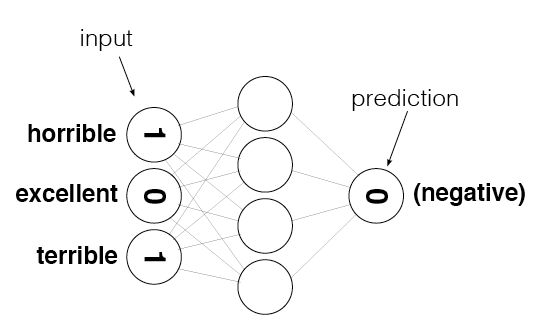

In [13]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

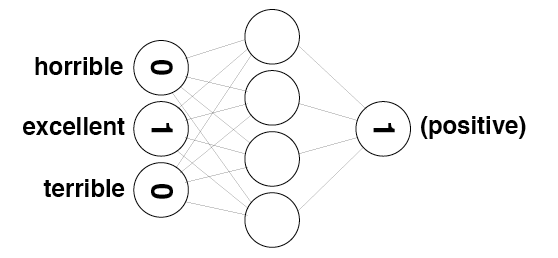

In [14]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [15]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [16]:
list(vocab)

['',
 'sniffle',
 'wolfs',
 'qustions',
 'khali',
 'complemented',
 'sargent',
 'bricked',
 'scrubbing',
 'burger',
 'zukovic',
 'kinlaw',
 'move',
 'clegg',
 'oxford',
 'authoress',
 'greendale',
 'pereira',
 'figures',
 'capability',
 'govind',
 'bipartisanism',
 'nimble',
 'henshaw',
 'sailors',
 'crahan',
 'shmeared',
 'evokes',
 'maximillian',
 'trevethyn',
 'eschatalogy',
 'foursome',
 'dooblebop',
 'unsympathetically',
 'agers',
 'poorness',
 'dutta',
 'aces',
 'cluelessly',
 'wastage',
 'insulates',
 'advertisement',
 'lookie',
 'najwa',
 'degeneracy',
 'ricans',
 'judicial',
 'depravation',
 'interns',
 'denice',
 'persians',
 'scenery',
 'contraptions',
 'piloted',
 'shumaker',
 'saber',
 'overload',
 'elie',
 'octopus',
 'zmeu',
 'dialoques',
 'snowbell',
 'monsterfest',
 'gould',
 'embellished',
 'garcon',
 'yewbenighted',
 'masti',
 'contrasted',
 'chekovian',
 'narasimhan',
 'chair',
 'kiki',
 'millionth',
 'grizzly',
 'bickered',
 'andersonville',
 'wavering',
 'tamsin',

In [17]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

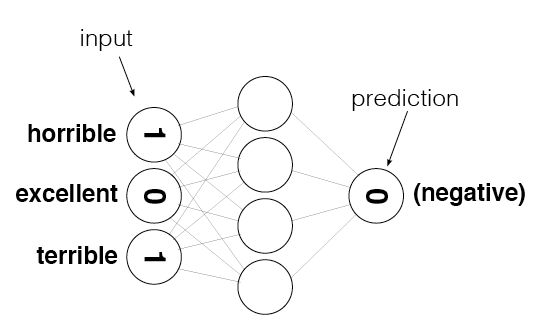

In [18]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [19]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'sniffle': 1,
 'wolfs': 2,
 'qustions': 3,
 'khali': 4,
 'complemented': 5,
 'sargent': 6,
 'bricked': 7,
 'scrubbing': 8,
 'burger': 9,
 'zukovic': 10,
 'kinlaw': 11,
 'move': 12,
 'clegg': 13,
 'oxford': 14,
 'authoress': 15,
 'greendale': 16,
 'pereira': 17,
 'figures': 18,
 'capability': 19,
 'govind': 20,
 'bipartisanism': 21,
 'nimble': 22,
 'henshaw': 23,
 'sailors': 24,
 'crahan': 25,
 'shmeared': 26,
 'evokes': 27,
 'maximillian': 28,
 'trevethyn': 29,
 'eschatalogy': 30,
 'foursome': 31,
 'dooblebop': 32,
 'unsympathetically': 33,
 'agers': 34,
 'poorness': 35,
 'dutta': 36,
 'aces': 37,
 'cluelessly': 38,
 'wastage': 39,
 'insulates': 40,
 'advertisement': 41,
 'lookie': 42,
 'najwa': 43,
 'degeneracy': 44,
 'ricans': 45,
 'judicial': 46,
 'depravation': 47,
 'interns': 48,
 'denice': 49,
 'persians': 50,
 'scenery': 51,
 'contraptions': 52,
 'piloted': 53,
 'shumaker': 54,
 'saber': 55,
 'overload': 56,
 'elie': 57,
 'octopus': 58,
 'zmeu': 59,
 'dialoques': 60,
 '

In [20]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [21]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [22]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [23]:
labels[0]

'POSITIVE'

In [24]:
get_target_for_label(labels[0])

1

In [25]:
labels[1]

'NEGATIVE'

In [26]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [27]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [28]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [29]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):390.9% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [30]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):127.4 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):153.8 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):172.2 #Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):181.9 #Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):188.1 #Correct:6250 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):189.8 #Correct:7500 #Trained:15001 Training Accuracy:49.9%
Progress:62.9% Speed(reviews/sec):189.9 #Correct:7557 #Trained:15116 Training Accuracy:49.9%

KeyboardInterrupt: 

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [ ]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [ ]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

# Understanding Neural Noise

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [ ]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [ ]:
layer_0

In [ ]:
review_counter = Counter()

In [ ]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [ ]:
review_counter.most_common()

# Project 4: Reducing Noise in our Input Data

In [ ]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # TODO: Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # TODO: Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # TODO: Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [ ]:
mlp.train(reviews[:-1000],labels[:-1000])

In [ ]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

# Analyzing Inefficiencies in our Network

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
layer_0 = np.zeros(10)

In [ ]:
layer_0

In [ ]:
layer_0[4] = 1
layer_0[9] = 1

In [ ]:
layer_0

In [ ]:
weights_0_1 = np.random.randn(10,5)

In [ ]:
layer_0.dot(weights_0_1)

In [ ]:
indices = [4,9]

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [ ]:
layer_1

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

# Project 5: Making our Network More Efficient

In [ ]:
import time
import sys

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer

            # Hidden layer
#             layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [ ]:
mlp.train(reviews[:-1000],labels[:-1000])

In [ ]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

# Further Noise Reduction

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [31]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [32]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

In [106]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [107]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [108]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [109]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Futher Noise reduction by filtering out irrelevant data points

In [43]:
#Testing filter settings

total_cnt = Counter()
pos_word_cnt = Counter()

for review, label in zip(reviews, labels):
    for word in set(review.split(" ")): #prevents oversampling word occurences that show in teh same review
        #review_vocab.add(word)
        total_cnt[word] += 1.0
        if label == 'POSITIVE':
            pos_word_cnt[word] += 1.0
total_vocab_size = 0.0
for word, cnt in  total_cnt.items():
    ratio = pos_word_cnt[word]/cnt
    if  abs(ratio - 0.5) > 0.25 and cnt >= 20: #filtering for items that are at least 70% positive or negative 
        print(word, ratio, cnt)
        total_vocab_size += 1.0
print('Vocab Size', total_vocab_size)

pathetic 0.13394919168591224 433.0
grader 0.19230769230769232 26.0
unnatural 0.11904761904761904 42.0
terrific 0.8193384223918575 393.0
sailor 0.7804878048780488 41.0
stinks 0.16483516483516483 91.0
forehead 0.17391304347826086 23.0
tender 0.8061224489795918 98.0
stupid 0.17455621301775148 1352.0
sidewalk 0.7894736842105263 38.0
bland 0.20233463035019456 257.0
lemmon 0.8181818181818182 66.0
lethargic 0.14285714285714285 21.0
dull 0.17988668555240794 706.0
stark 0.8133333333333334 75.0
stewart 0.7757009345794392 214.0
facing 0.7613636363636364 88.0
favourite 0.7526501766784452 283.0
sluggish 0.2 20.0
badly 0.15851602023608768 593.0
razzie 0.04 25.0
unsympathetic 0.23076923076923078 52.0
alright 0.2342857142857143 175.0
horrible 0.15254237288135594 1003.0
boring 0.2002652519893899 1508.0
worse 0.16588050314465408 1272.0
warehouse 0.20588235294117646 34.0
fantastic 0.8022440392706872 713.0
brilliant 0.7577821011673151 1028.0
superb 0.8438003220611916 621.0
favorite 0.765625 1088.0
underra

In [95]:
import time
import sys

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.01):
       
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self,reviews, labels, min_count = 25, polarity = 0.05):
        """
        """
        
        total_cnt = Counter()
        pos_word_cnt = Counter()
        self.review_vocab = []
        
        for review, label in zip(reviews, labels):
            for word in set(review.split(" ")):
                #review_vocab.add(word)
                total_cnt[word] += 1.0
                if label == 'POSITIVE':
                    pos_word_cnt[word] += 1.0
        
        for word, cnt in  total_cnt.items():
            ratio = pos_word_cnt[word]/cnt
            if  abs(ratio - 0.5) > polarity and cnt >= min_count: 
                self.review_vocab.append(word)
        
        print('Total Vocab Size', len(self.review_vocab))
        
        self.word2index = {}
        for idx, word in enumerate(self.review_vocab):
            self.word2index[word] = idx
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
        self.layer_1 = np.zeros((1,hidden_nodes))
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def train(self, training_reviews_raw, training_labels):
        
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer

            # Hidden layer
#             layer_1 = self.layer_0.dot(self.weights_0_1)
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]
            
            # Output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
        
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer


        # Hidden layer
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [96]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

Total Vocab Size 7320


In [97]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:99.9% Speed(reviews/sec):2917. #Correct:20612 #Trained:24000 Training Accuracy:85.8%

In [98]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2811.% #Correct:846 #Tested:1000 Testing Accuracy:84.6%

In [101]:
def get_most_similar_words(focus = "horrible"):
    closest_match = Counter()
    
    focus_idx = mlp.word2index[focus]
    
    for word, word_idx in mlp.word2index.items():
        
        closest_match[word] = np.dot(mlp.weights_0_1[word_idx], mlp.weights_0_1[focus_idx])
    return closest_match.most_common()

In [102]:
get_most_similar_words("horrible")

[('worst', 0.84952454821268197),
 ('awful', 0.74985914485439908),
 ('waste', 0.6946523077500022),
 ('poorly', 0.55909680641432669),
 ('disappointment', 0.55801620554025633),
 ('dull', 0.55689356370835341),
 ('terrible', 0.54433136129935455),
 ('mess', 0.5185855129407283),
 ('badly', 0.51810590820808122),
 ('boring', 0.5119887213119011),
 ('fails', 0.50266579234567488),
 ('disappointing', 0.49094164657431738),
 ('poor', 0.47847809301991534),
 ('worse', 0.45917872994618297),
 ('annoying', 0.44559389522301851),
 ('wasted', 0.43883711324673519),
 ('ridiculous', 0.43165045466305524),
 ('lacks', 0.42949855269069387),
 ('avoid', 0.42230156452239598),
 ('horrible', 0.41567636869514524),
 ('unfortunately', 0.40939036864365469),
 ('effort', 0.39725120556574667),
 ('pointless', 0.38198161269983866),
 ('predictable', 0.37766851932710099),
 ('supposed', 0.37448377342560174),
 ('oh', 0.35947694354741067),
 ('disappointed', 0.35133692266335509),
 ('lame', 0.35102258850318269),
 ('save', 0.35061689273

In [103]:
get_most_similar_words("excellent")

[('perfect', 0.77890768149663647),
 ('excellent', 0.7609791811085429),
 ('amazing', 0.66852083543512308),
 ('wonderful', 0.59910393646513549),
 ('great', 0.58226429846923966),
 ('fantastic', 0.57438403234267821),
 ('today', 0.5523985218869929),
 ('fun', 0.53600953510103166),
 ('best', 0.49758798579095387),
 ('superb', 0.48829097246016084),
 ('loved', 0.48752396788228758),
 ('favorite', 0.48692599413175375),
 ('incredible', 0.47456842100643237),
 ('enjoyed', 0.46854926046437251),
 ('rare', 0.46329412781885604),
 ('definitely', 0.45928413150012787),
 ('enjoyable', 0.45698259366250465),
 ('liked', 0.45611536457820695),
 ('gem', 0.44386812305208218),
 ('funniest', 0.44132451783715065),
 ('refreshing', 0.44107085332485224),
 ('wonderfully', 0.43902197194458215),
 ('perfectly', 0.42884996905459344),
 ('simple', 0.41062953135038982),
 ('masterpiece', 0.40891985186912999),
 ('knowing', 0.39904095692250852),
 ('entertaining', 0.39869189427545537),
 ('beautiful', 0.3976980326892452),
 ('captures

In [104]:
get_most_similar_words("segal")

[('worst', 0.23398470055371673),
 ('awful', 0.20653384041151529),
 ('waste', 0.19132821124450955),
 ('poorly', 0.1539921349001962),
 ('disappointment', 0.15369450480525737),
 ('dull', 0.15338529536166973),
 ('terrible', 0.14992528567136831),
 ('mess', 0.14283410198354113),
 ('badly', 0.1427020043649512),
 ('boring', 0.14101714646750116),
 ('fails', 0.13844933044966445),
 ('disappointing', 0.13522014685122602),
 ('poor', 0.1317873080328569),
 ('worse', 0.12647168095747049),
 ('annoying', 0.1227300074632096),
 ('wasted', 0.12086898577672198),
 ('ridiculous', 0.11888956309821078),
 ('lacks', 0.11829686434726441),
 ('avoid', 0.11631459658938648),
 ('horrible', 0.11448981769981763),
 ('unfortunately', 0.11275846356435076),
 ('effort', 0.10941497167381868),
 ('pointless', 0.10520926493841756),
 ('predictable', 0.10402130884768013),
 ('supposed', 0.10314413370580837),
 ('oh', 0.099010799827821364),
 ('disappointed', 0.096768792397825459),
 ('lame', 0.096682215283018721),
 ('save', 0.096570474

In [105]:
get_most_similar_words("denzel")

[('perfect', 0.056035653201637461),
 ('excellent', 0.054745853069942424),
 ('amazing', 0.048094276873135791),
 ('wonderful', 0.043100332957290453),
 ('great', 0.041888867032386472),
 ('fantastic', 0.041321950220170489),
 ('today', 0.039740283395433861),
 ('fun', 0.03856123791715621),
 ('best', 0.035797140625841418),
 ('superb', 0.035128301137939202),
 ('loved', 0.035073121809822687),
 ('favorite', 0.035030102783942481),
 ('incredible', 0.034141082559191523),
 ('enjoyed', 0.033708056154763515),
 ('rare', 0.033329994932043326),
 ('definitely', 0.03304151047054163),
 ('enjoyable', 0.032875934781453939),
 ('liked', 0.032813545169220679),
 ('gem', 0.031932462346265386),
 ('funniest', 0.031749472008524834),
 ('refreshing', 0.031731223046576731),
 ('wonderfully', 0.031583823798625413),
 ('perfectly', 0.030852036399617824),
 ('simple', 0.029541233909632106),
 ('masterpiece', 0.029418237296845146),
 ('knowing', 0.028707536472608014),
 ('entertaining', 0.028682424442131781),
 ('beautiful', 0.028